In [ ]:
! pip install scenedetect[opencv]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
! pip install ffmpeg-python

In [ ]:
!pip install pytube


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

# Replace 'your_video_url' with the actual YouTube video URL
video_url = 'https://youtu.be/z3cEx_Pc_nE?si=CGyBPk9OGZ1XeBPh'
youtube = YouTube(video_url)

# Get the highest resolution stream
video_stream = youtube.streams.get_highest_resolution()

# Download the video
video_stream.download()

'/content/جولة تفقدية للرئيس السيسي في مدينة الجلالة شملت عددًا من المناطق هناك.mp4'

### Detect senes

In [ ]:
import ffmpeg
! scenedetect -i video.mp4 time -s 10s detect-content list-scenes

[PySceneDetect] PySceneDetect 0.6.2
[PySceneDetect] Scene list filename format:
  $VIDEO_NAME-Scenes.csv
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Detecting scenes...
Detected: 52 | Progress: 100% 4045/4045 [00:22<00:00, 181.78frames/s]
[PySceneDetect] Processed 4045 frames in 22.4 seconds (average 180.78 FPS).
[PySceneDetect] Detected 53 scenes, average shot length 3.1 seconds.
[PySceneDetect] Writing scene list to CSV file:
  video-Scenes.csv
[PySceneDetect] Scene List:
-----------------------------------------------------------------------
 | Scene # | Start Frame |  Start Time  |  End Frame  |   End Time   |
-----------------------------------------------------------------------
 |      1  |         251 | 00:00:10.000 |         281 | 00:00:11.240 |
 |      2  |         282 | 00:00:11.240 |         318 | 00:00:12.720 |
 |      3  |         319 | 00:00:12.720 |         355 | 00:00:14.200 |
 |      4  |         356 | 00:00:14.200 |     

### Save 3 shots per sene

In [ ]:
!scenedetect -i video.mp4 save-images
# the images saved automatic to the work directory

[PySceneDetect] PySceneDetect 0.6.2
[PySceneDetect] Image output format set: JPEG [Quality: 95]
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Detecting scenes...
Detected: 52 | Progress: 100% 4295/4295 [00:21<00:00, 197.83frames/s]
[PySceneDetect] Processed 4295 frames in 21.7 seconds (average 197.79 FPS).
[PySceneDetect] Detected 53 scenes, average shot length 3.2 seconds.
[PySceneDetect] Comma-separated timecode list:
  00:00:01.880,00:00:08.760,00:00:09.720,00:00:11.240,00:00:12.720,00:00:14.200,00:00:15.160,00:00:16.720,00:00:17.720,00:00:18.320,00:00:20.640,00:00:22.680,00:00:24.760,00:00:26.560,00:00:33.360,00:00:34.360,00:00:36.600,00:00:39.120,00:00:44.560,00:00:52.360,00:00:55.400,00:01:00.880,00:01:02.480,00:01:04.200,00:01:06.240,00:01:07.440,00:01:08.920,00:01:10.840,00:01:12.640,00:01:17.000,00:01:20.960,00:01:27.120,00:01:29.400,00:01:32.640,00:01:41.920,00:01:44.640,00:01:48.360,00:01:53.560,00:01:55.920,00:01:59.600,00:02:01.

In [ ]:
!pip install transformers torch matplotlib

In [ ]:
import os
import shutil

source_folder = "/content"
destination_folder = "/content/DATA"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source folder
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Move each file to the destination folder
for file in files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    shutil.move(source_path, destination_path)

print("Images moved successfully.")


Images moved successfully.


In [ ]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [ ]:
! pip install transformers -q


In [ ]:
from transformers import pipeline


In [ ]:
caption = pipeline('image-to-text')


config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

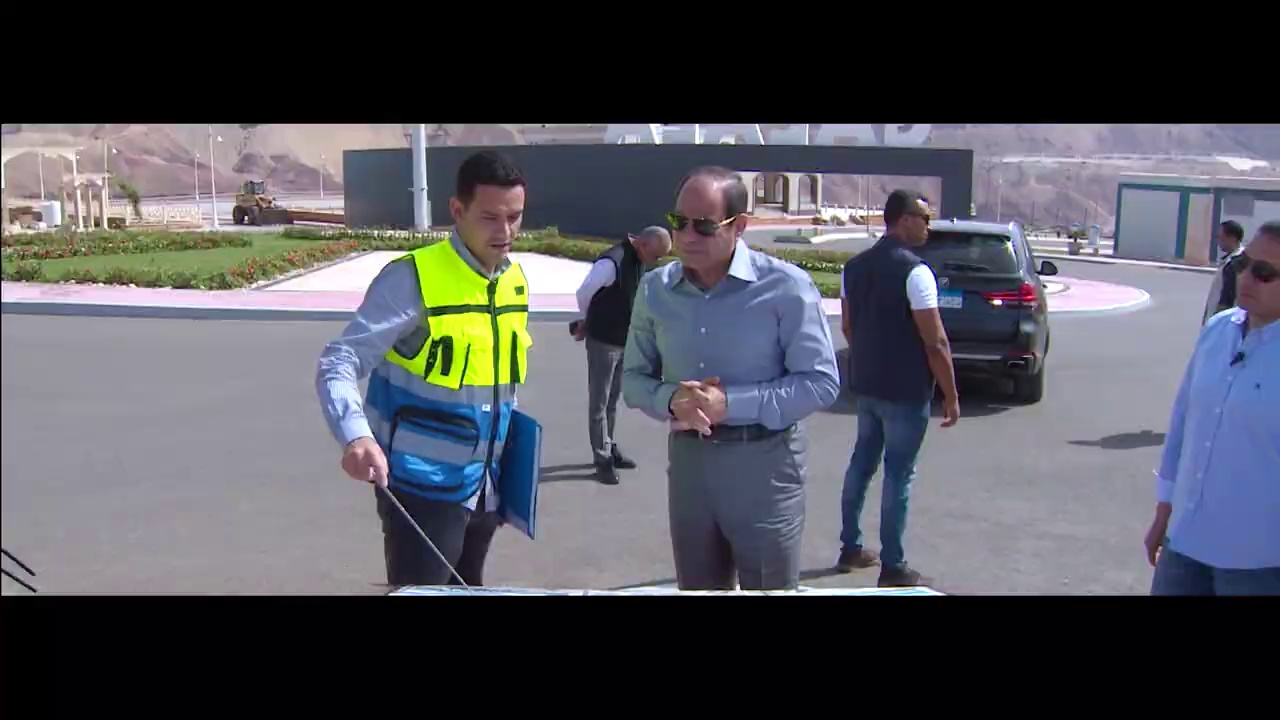

In [ ]:
from IPython.display import Image
Image(filename='/content/DATA/video-Scene-032-03.jpg')


### Model 1

In [ ]:
caption('/content/DATA/video-Scene-032-03.jpg')


[{'generated_text': 'two men walking down the street with a skateboard '}]

In [ ]:
from transformers import BlipForConditionalGeneration, BlipProcessor
import cv2
# Load BLIP model and processor
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and preprocess a single image
image_path = "/content/DATA/video-Scene-032-03.jpg"
image = cv2.imread(image_path)

# Process the image using the BLIP processor
inputs = processor(images=image, padding="max_length", max_length=512, return_tensors="pt")

# Generate captions
outputs = model.generate(**inputs)

# Decode and print the generated captions
decoded_captions = processor.decode(outputs[0], skip_special_tokens=True)
print("Generated Caption:", decoded_captions)


Generated Caption: a man in a green vest is being escorted by police


### Model 2

In [ ]:
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# URL of the image
img_url = '/content/DATA/video-Scene-039-02.jpg'

# Download and open the image using PIL
image = Image.open(img_url)

# Preprocess the image using the processor
inputs = processor(images=image, return_tensors="pt")

# Conditional image captioning
text = "a photography of"
inputs_conditional = processor(images=image, text=text, return_tensors="pt")

# Generate captions
out_unconditional = model.generate(**inputs)
out_conditional = model.generate(**inputs_conditional)

# Decode and print captions
print("Unconditional Caption:", processor.decode(out_unconditional[0], skip_special_tokens=True))
print("Conditional Caption:", processor.decode(out_conditional[0], skip_special_tokens=True))


Unconditional Caption: arafed man in a yellow vest talking to a man in a blue shirt
Conditional Caption: a photography of a man in a yellow vest talking to a man in a blue shirt


### Model 3

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

predict_step(['/content/DATA/video-Scene-032-03.jpg'])

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

['two men walking down the street with a skateboard']